# Imports

In [40]:
import pandas as pd
import numpy as np
import scipy.stats as stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Data preparation 

Load Data

In [41]:
columnNames = ['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 
               'Compactness', 'Concavity', 'ConcavePoints', 'Symmetry', 'FractalDimension', 
               'seRadius', 'seTexture', 'sePerimeter', 'seArea', 'seSmoothness', 'seCompactness', 'seConcavity', 
               'seConcavePoints', 'seSymmetry', 'seFractalDimension', 'worstRadius', 'worstTexture', 
               'worstPerimeter', 'worstArea', 'worstSmoothness', 'worstCompactness', 'worstConcavity', 
               'worstConcavePoints', 'worstSymmetry', 'worstFractalDimension']

dataURL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

df = pd.read_csv(dataURL, header=None, names=columnNames)

In [42]:
df.head()

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,...,worstRadius,worstTexture,worstPerimeter,worstArea,worstSmoothness,worstCompactness,worstConcavity,worstConcavePoints,worstSymmetry,worstFractalDimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check for missing values

In [43]:
df.isnull().sum()

ID                       0
Diagnosis                0
Radius                   0
Texture                  0
Perimeter                0
Area                     0
Smoothness               0
Compactness              0
Concavity                0
ConcavePoints            0
Symmetry                 0
FractalDimension         0
seRadius                 0
seTexture                0
sePerimeter              0
seArea                   0
seSmoothness             0
seCompactness            0
seConcavity              0
seConcavePoints          0
seSymmetry               0
seFractalDimension       0
worstRadius              0
worstTexture             0
worstPerimeter           0
worstArea                0
worstSmoothness          0
worstCompactness         0
worstConcavity           0
worstConcavePoints       0
worstSymmetry            0
worstFractalDimension    0
dtype: int64

Set number of training and test samples

In [44]:
n_samples, n_features = df.shape
train_test_ratio = 0.7
n_training_samples = int(n_samples * 0.7)
n_test_samples = n_samples - n_training_samples

Shuffle the data and split into training and test sets

In [45]:
dfShuffled = df.sample(frac=1)
dfTrain = dfShuffled.iloc[0:n_training_samples,:]
dfTest = dfShuffled.iloc[n_training_samples:n_samples,:]
dfTrainX = dfShuffled.iloc[0:n_training_samples,2:n_features]
dfTestX = dfShuffled.iloc[n_training_samples:n_samples,2:n_features]
dfTrainY = dfShuffled['Diagnosis'].iloc[0:n_training_samples]
dfTestY = dfShuffled['Diagnosis'].iloc[n_training_samples:n_samples]

Convert data to arrays

In [46]:
X_train = dfTrainX.values.astype(float)
X_test = dfTestX.values.astype(float)
y_train = (dfTrainY.values == 'M').astype(int)
y_test = (dfTestY.values == 'M').astype(int)

In [47]:
X_train.shape

(398, 30)

Do some checks to confirm that data is split correctly..

In [48]:
abs(X_train[:,0].sum() + X_test[:,0].sum() - df['Radius'].sum()) < 0.0000000001

True

In [49]:
y_train.sum() + y_test.sum() == (df['Diagnosis'] == 'M').sum()

True

# Visualisations 

In [50]:
def plot_data_np(X1, X2, Y, x1Label, x2Label, ax):
    
    title = x1Label + ' vs ' + x2Label
    
    x1Min = X1.min()
    x1Max = X1.max()
    x2Min = X2.min()
    x2Max = X2.max()
    
    ax.plot(X1[Y==0], X2[Y==0], "bs")    
    ax.plot(X1[Y==1], X2[Y==1], "r^")
    ax.axis([x1Min, x1Max, x2Min, x2Max])
    ax.set_xlabel(x1Label)
    ax.set_ylabel(x2Label)
    ax.set_title(title)

In [51]:
def plot_data(df, x1Label, x2Label, ax):
    
    plot_data_np(df[x1Label].values, df[x2Label].values, (df['Diagnosis'].values == 'M')*1, x1Label, x2Label, ax)

<Figure size 432x288 with 0 Axes>

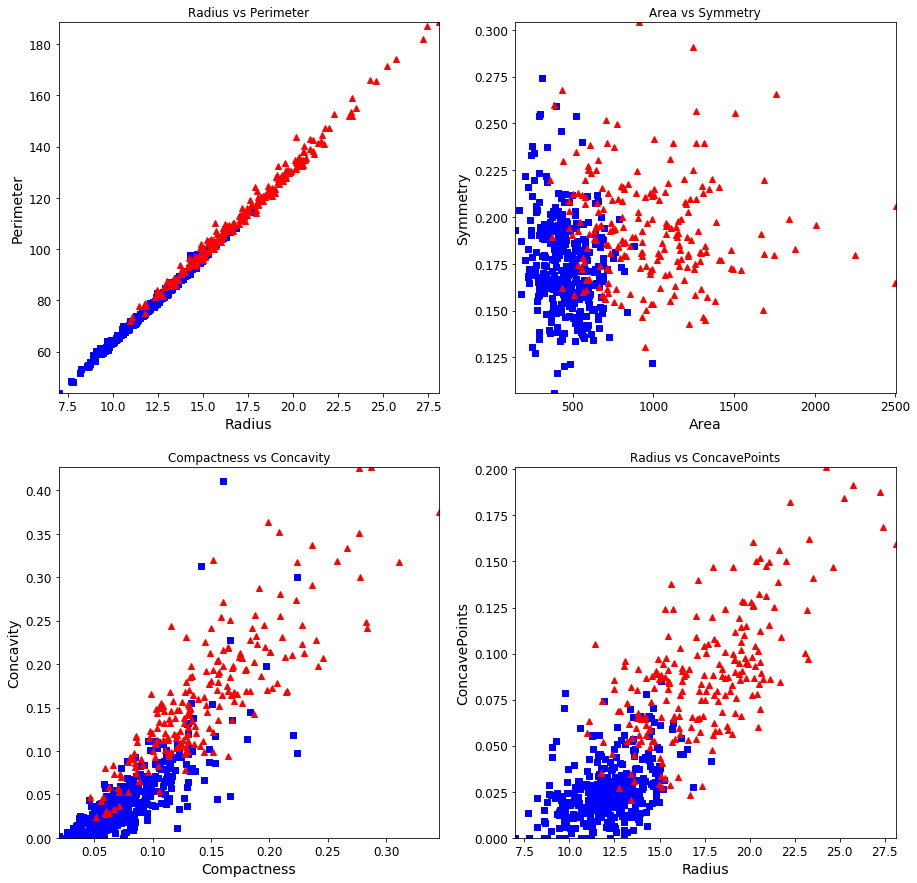

In [52]:
plt.figure(1)
fig, axarr = plt.subplots(2, 2)
plot_data(df, 'Radius', 'Perimeter', axarr[0, 0])
plot_data(df, 'Area', 'Symmetry', axarr[0, 1])
plot_data(df, 'Compactness', 'Concavity', axarr[1, 0])
plot_data(df, 'Radius', 'ConcavePoints', axarr[1, 1])
fig.set_size_inches(15, 15)
plt.show()

# Part 1: Mean, Median and Variance of Perimeter 

In [53]:
dfTrainX.append(dfTestX)['Perimeter'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: Perimeter, dtype: float64

# Part 2: Distribution of Radius

## Histogram 

In [54]:
radii = df['Radius'].values
minRadius, maxRadius = np.min(radii) , np.max(radii)
maxRadius - minRadius

21.128999999999998

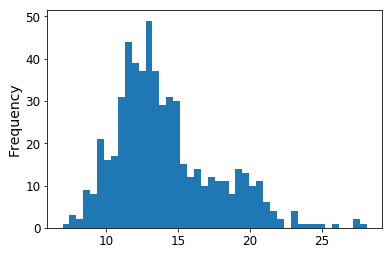

In [55]:
plt.figure(2)
df['Radius'].plot.hist(44)

The distibution looks skewed. A normal distribution should be symmetric.

## Skewness 

In [56]:
df['Radius'].skew()

0.9423795716730992

In [57]:
meanOfRadius = df['Radius'].mean()
varianceOfRadius = df['Radius'].var()
medianOfRadius = df['Radius'].median()

In [58]:
meanOfRadius, varianceOfRadius, medianOfRadius

(14.127291739894552, 12.418920129526722, 13.37)

Median <> Mean - another common indicator of skewness (doesn't always hold though)

## Formal test of fit 

SciPy has a built in function to test normality (D’Agostino and Pearson’s test):

In [59]:
stats.normaltest(radii)

NormaltestResult(statistic=73.17938185797058, pvalue=1.286172249506454e-16)

## Alternative distributions 

Could try: log-normal distrbution, gamma distribution

# Part 3: Train some classifiers

## Dumb classifier 

In [60]:
from sklearn import metrics

In [61]:
y_pred_dumb = np.random.randint(2, size=y_test.shape[0])

In [62]:
metrics.confusion_matrix(y_test, y_pred_dumb)

array([[51, 58],
       [25, 37]])

In [63]:
metrics.f1_score(y_test, y_pred_dumb)

0.4713375796178344

## Logistic Regression 

### Using two features 

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
featureIndices = (3,8)

In [66]:
logisticClassifier = LogisticRegression(C=0.1, random_state=42)
logisticClassifier.fit(X_train[:,featureIndices], y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
y_pred_logistic = logisticClassifier.predict(X_test[:,featureIndices])

In [68]:
metrics.confusion_matrix(y_test, y_pred_logistic)

array([[108,   1],
       [ 13,  49]])

In [69]:
metrics.f1_score(y_test, y_pred_logistic)

0.8749999999999999

In [70]:
def plot_boundary_np(w0, w1, w2, X1, X2, Y, ax):
       
    x1Min = X1.min()
    x1Max = X1.max()
    x2Min = X2.min()
    x2Max = X2.max()
    x1vals = np.linspace(x1Min, x1Max, 100)                  
    x2vals = -(w1 * x1vals + w0) / w2
    ax.axis([x1Min, x1Max, x2Min, x2Max])
    ax.plot(x1vals, x2vals, "k-")

<Figure size 432x288 with 0 Axes>

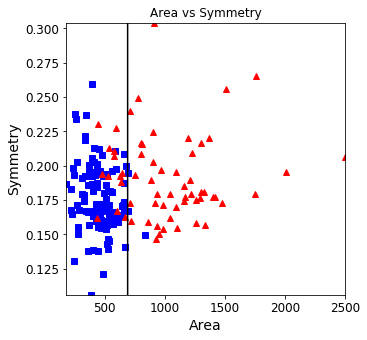

In [71]:
w0 = logisticClassifier.intercept_
w = logisticClassifier.coef_[0]
X1 = X_test[:,featureIndices[0]]
X2 = X_test[:,featureIndices[1]]
Y = y_test
x1Label = dfTrainX.columns.values[featureIndices[0]]
x2Label = dfTrainX.columns.values[featureIndices[1]]

plt.figure(2)
fig, axarr = plt.subplots(1, 1)
plot_data_np(X1, X2, Y, x1Label, x2Label, axarr)
plot_boundary_np(w0, w[0], w[0], X1, X2, Y, axarr)
fig.set_size_inches(5, 5)
plt.show()

### Using all features 

In [72]:
logisticClassifier = LogisticRegression(C=0.1, random_state=42)
logisticClassifier.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
y_pred_logistic = logisticClassifier.predict(X_test)

In [74]:
metrics.confusion_matrix(y_test, y_pred_logistic)

array([[107,   2],
       [  5,  57]])

In [75]:
metrics.f1_score(y_test, y_pred_logistic)

0.9421487603305785

## Linear SVM using two features

In [76]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [77]:
linearSVMPipeline = Pipeline([("scaler", StandardScaler()),('linearSVC',SVC(kernel="linear", C=1.0))])
linearSVMPipeline.fit(X_train[:,featureIndices], y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [78]:
y_pred_linear_SVM = linearSVMPipeline.predict(X_test[:,featureIndices])

In [79]:
metrics.confusion_matrix(y_test, y_pred_linear_SVM)

array([[102,   7],
       [ 10,  52]])

In [80]:
metrics.f1_score(y_test, y_pred_linear_SVM)

0.859504132231405

In [92]:
def plot_svc_decision_boundary_two_features(scaler, classifier, X_test, Y_test, x1Label, x2Label, ax):
    
    X_test_scaled = scaler.fit_transform(X_test)
    X1 = X_test_scaled[:,0]
    X2 = X_test_scaled[:,1]
    x1min = X1.min()
    x1max = X1.max()
    x2min = X2.min()
    x2max = X2.max()
    Y = Y_test
    
    # Plot the data points first
    ax.plot(X1[Y==0], X2[Y==0], "bs")    
    ax.plot(X1[Y==1], X2[Y==1], "r^")
    
    # Now plot decision boundary
    w = classifier.coef_[0]
    w0 = classifier.intercept_[0]

    x0 = np.linspace(x1min, x1max, 200)
    x1 = -w[0]/w[1] * x0 - w0/w[1]

    margin = 1/w[1]
    gutter_up = x1 + margin
    gutter_down = x1 - margin

    ax.plot(x0, x1, "k-", linewidth=2)
    ax.plot(x0, gutter_up, "k--", linewidth=2)
    ax.plot(x0, gutter_down, "k--", linewidth=2)
    
    ax.axis([x1min, x1max, x2min, x2max])
    ax.set_xlabel(x1Label)
    ax.set_ylabel(x2Label)
    ax.set_title(x1Label + ' vs ' + x2Label)

<Figure size 432x288 with 0 Axes>

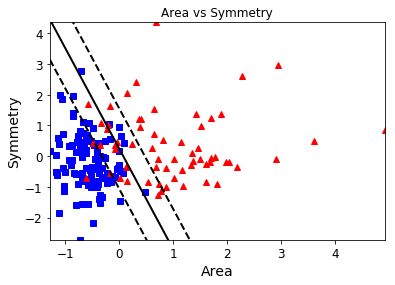

In [94]:
x1Label = dfTrainX.columns.values[featureIndices[0]]
x2Label = dfTrainX.columns.values[featureIndices[1]]
plt.figure(3)
fig, ax = plt.subplots(1, 1)
plot_svc_decision_boundary_two_features(linearSVMPipeline.named_steps['scaler'], 
                                        linearSVMPipeline.named_steps['linearSVC'], 
                                        X_test[:,featureIndices], y_test, x1Label, x2Label, ax)

## Kernel SVM 

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
kernelSVMPipeline = Pipeline([("scaler", StandardScaler())
                                ,('KernelSVC',SVC(kernel="poly", C=1.0, degree=3))])
kernelSVMPipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [97]:
y_pred_kernel_SVM = kernelSVMPipeline.predict(X_test)

In [98]:
metrics.confusion_matrix(y_test, y_pred_kernel_SVM)

array([[109,   0],
       [ 16,  46]])

In [99]:
metrics.f1_score(y_test, y_pred_kernel_SVM)

0.8518518518518519

In [100]:
metrics.roc_curve(y_test, y_pred_kernel_SVM)

(array([0., 1.]), array([0.74193548, 1.        ]), array([1, 0]))